# Data Analysis Project with Python

# International Database (United States Census Bureau) - Single Year

In [2]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

## Exploring the IDB Single Year database

Variable descriptions: https://api.census.gov/data/timeseries/idb/1year/variables.html

In [3]:
idbsingleyear = pd.read_table("idbzip/idbsingleyear.txt", delimiter="|")
idbsingleyear.head(10)

,#YR,GEO_ID,AGE,SEX,POP
0,1990,W140000WOAD,0,0,504
1,1990,W140000WOAD,0,1,264
2,1990,W140000WOAD,0,2,240
3,1990,W140000WOAD,1,0,550
4,1990,W140000WOAD,1,1,279
5,1990,W140000WOAD,1,2,271
6,1990,W140000WOAD,2,0,489
7,1990,W140000WOAD,2,1,260
8,1990,W140000WOAD,2,2,229
9,1990,W140000WOAD,3,0,515


In [4]:
# Dimensions (number of rows and columns)
idbsingleyear.shape

(7923753, 5)

In [5]:
# Check for data types and other essential information
idbsingleyear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7923753 entries, 0 to 7923752
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   #YR     int64 
 1   GEO_ID  object
 2   AGE     int64 
 3   SEX     int64 
 4   POP     int64 
dtypes: int64(4), object(1)
memory usage: 302.3+ MB


In [6]:
# Describe the numerical columns
idbsingleyear.describe()

,#YR,AGE,SEX,POP
count,7.923753e+06,7.923753e+06,7.923753e+06,7.923753e+06
mean,2.042538e+03,5.000000e+01,1.000000e+00,2.526350e+05
std,3.389533e+01,2.915476e+01,8.164966e-01,1.087511e+06
min,1.950000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.014000e+03,2.500000e+01,0.000000e+00,1.469000e+03
50%,2.043000e+03,5.000000e+01,1.000000e+00,2.403200e+04
75%,2.072000e+03,7.500000e+01,2.000000e+00,1.342220e+05
max,2.100000e+03,1.000000e+02,2.000000e+00,3.063062e+07


In [7]:
# Count the number of unique values in a column
for col in idbsingleyear:
    print(f'Number of unique values in the column {col} is: {idbsingleyear[col].nunique()}')
    print(f'Number of NaN values in the column {col} is: {idbsingleyear[col].isna().sum()}')
    print('')

Number of unique values in the column #YR is: 151
Number of NaN values in the column #YR is: 0

Number of unique values in the column GEO_ID is: 227
Number of NaN values in the column GEO_ID is: 0

Number of unique values in the column AGE is: 101
Number of NaN values in the column AGE is: 0

Number of unique values in the column SEX is: 3
Number of NaN values in the column SEX is: 0

Number of unique values in the column POP is: 1095125
Number of NaN values in the column POP is: 0



In [8]:
# Show the first 20 unique values of the GEO_ID
idbsingleyear['GEO_ID'].unique()[:20]

array(['W140000WOAD', 'W140000WOAE', 'W140000WOAF', 'W140000WOAG',
       'W140000WOAI', 'W140000WOAL', 'W140000WOAM', 'W140000WOAO',
       'W140000WOAR', 'W140000WOAS', 'W140000WOAT', 'W140000WOAU',
       'W140000WOAW', 'W140000WOAZ', 'W140000WOBA', 'W140000WOBB',
       'W140000WOBD', 'W140000WOBE', 'W140000WOBF', 'W140000WOBG'],
      dtype=object)

It seems like the GEO_IDs are quite similar; most of them starting with 'W140000WO' and then two distinctive letters.

After doing outside research, I think the two distinctive letters are the two-letter country codes listed in this website: https://www.census.gov/programs-surveys/international-programs/about/idb/countries-and-areas.html

In [9]:
# Check if every GEO_ID starts with 'W140000WO':
for row in idbsingleyear['GEO_ID']:
    if (not row.startswith('W140000WO')):
        result = False
        break
    else:
        result = True
print(result)

True


After checking all elements in the GEO_ID column with Python, my intuition is actually true.

## Analyzing the IDB Single Year database

1. Finding countries with the largest and the smallest population in 2023 (for both sexes)
(Because the data is most recently updated in November 2024, I choose 2023 as the latest year when data for a full year is available.)

In [10]:
# Filter for total population of each country in 2023 (both sexes) for each age
pop_2023 = (idbsingleyear['#YR'] == 2023) & (idbsingleyear['SEX'] == 0)
idbsingleyear_2023 = idbsingleyear[pop_2023]

# Summing the population of different ages
idbsingleyear_2023 = idbsingleyear_2023.groupby(['#YR', 'GEO_ID']).sum()
# Using groupby, we have set #YR and GEO_ID as the index of idbsingleyear_2023

# Only display the population column, not the total age column
idbsingleyear_2023 = idbsingleyear_2023[['POP']]

In [11]:
# Sort in the descending order
idbsingleyear_2023_largest = idbsingleyear_2023.sort_values('POP', ascending = False)
idbsingleyear_2023_largest = idbsingleyear_2023_largest.head(5)

# Show the results
idbsingleyear_2023_largest

POP
#YR  GEO_ID                 
2023 W140000WOCN  1409294306
     W140000WOIN  1399179585
     W140000WOUS   334914895
     W140000WOID   279476346
     W140000WOPK   247653551

According to the country codes for IDB, the top 5 countries with the largest population in 2023 from the dataset is: China (CN), India (IN), United States (US), Indonesia (ID), and Pakistan (PK).

Text(0.5, 1.05, 'Top 5 countries/ territories with largest population')

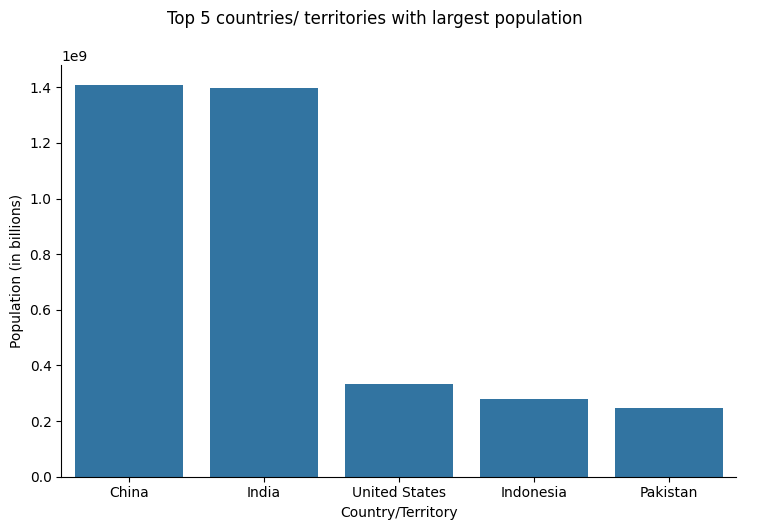

In [12]:
# Plotting the countries with largest population as a bar chart
largest_pop = sns.catplot(data = idbsingleyear_2023_largest, x = 'GEO_ID', y = 'POP', kind = 'bar', aspect = 1.5)
# Set the "aspect" parameter to have proper spacing between bars

largest_pop.set_axis_labels('Country/Territory', 'Population (in billions)')
largest_pop.set_xticklabels(['China', 'India', 'United States', 'Indonesia', 'Pakistan'])
largest_pop.fig.suptitle('Top 5 countries/ territories with largest population', y = 1.05)
# I set y = 1.05 to move the title up above the original graph

In [13]:
# Sort in the ascending order
idbsingleyear_2023_smallest = idbsingleyear_2023.sort_values('POP', ascending = True)
idbsingleyear_2023_smallest = idbsingleyear_2023_smallest.head(5)

According to the country codes for IDB, the top 5 countries (or territories?) with the smallest population in 2023 from the dataset is: Saint Pierre and Miquelon (PM), Montserrat (MS), Saint Barthelemy (BL), Saint Helena, Ascension, and Tristan da Cunha (SH), and Cook Islands (CK).

Text(0.5, 1.05, 'Top 5 countries/ territories with smallest population')

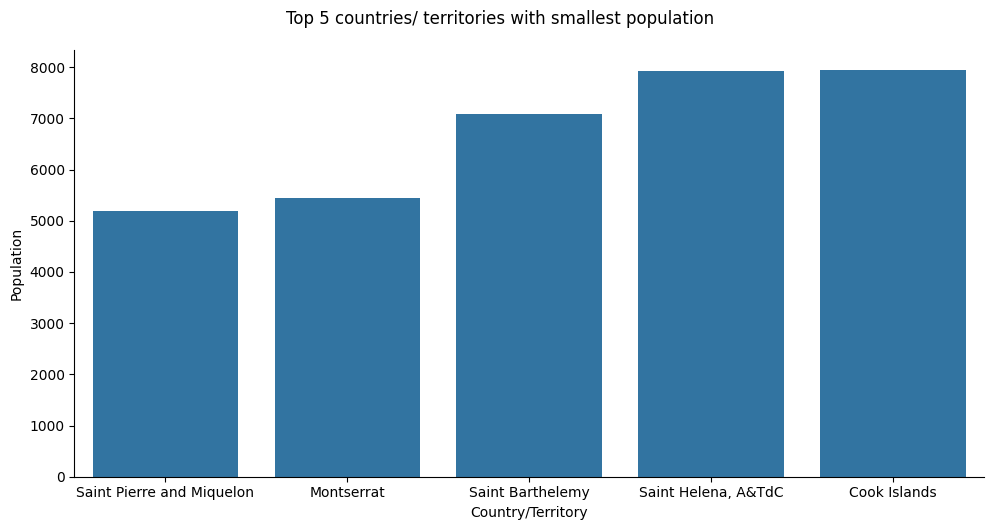

In [16]:
# Plotting territories with smallest population as a bar chart - same method as the previous part
smallest_pop = sns.catplot(data = idbsingleyear_2023_smallest, x = 'GEO_ID', y = 'POP', kind = 'bar', aspect = 2)

smallest_pop.set_axis_labels('Country/Territory', 'Population')
smallest_pop.set_xticklabels(['Saint Pierre and Miquelon', 'Montserrat', 'Saint Barthelemy', 'Saint Helena, A&TdC', 'Cook Islands'])
# I have to use abbreviations because the territory's name is very long
smallest_pop.fig.suptitle('Top 5 countries/ territories with smallest population', y = 1.05)